In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from statsmodels.tsa.api import ExponentialSmoothing,SimpleExpSmoothing,Holt

In [38]:
import warnings

In [39]:
warnings.filterwarnings('ignore')

In [7]:
ele=pd.read_csv('Electric_production.csv')

In [8]:
ele.head()

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


In [9]:
electricity=pd.read_csv('Electric_production.csv',header=0,index_col=0)

In [10]:
electricity.head()

,IPG2211A2N
DATE,
1/1/1985,72.5052
2/1/1985,70.6720
3/1/1985,62.4502
4/1/1985,57.4714
5/1/1985,55.3151


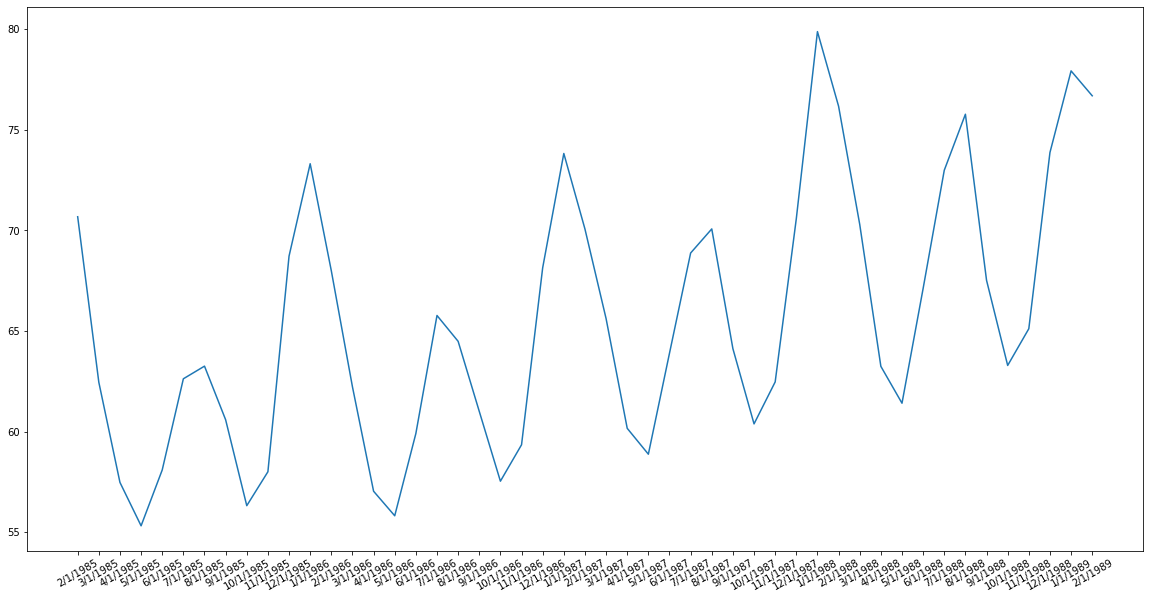

In [22]:
plt.figure(figsize=(20,10))
plt.plot(electricity[1:50]['IPG2211A2N'])
plt.xticks(rotation=30)
plt.show()

In [23]:
electricity_rolling=electricity[1:50].rolling(5).mean()

In [24]:
electricity_rolling

,IPG2211A2N
DATE,
2/1/1985,NaN
3/1/1985,NaN
4/1/1985,NaN
5/1/1985,NaN
6/1/1985,60.79982
7/1/1985,59.18946
8/1/1985,59.34912
9/1/1985,59.97176
10/1/1985,60.17182


In [31]:
electricity_rolling2=electricity[1:50].rolling(10).mean()

In [32]:
electricity_rolling2

,IPG2211A2N
DATE,
2/1/1985,NaN
3/1/1985,NaN
4/1/1985,NaN
5/1/1985,NaN
6/1/1985,NaN
7/1/1985,NaN
8/1/1985,NaN
9/1/1985,NaN
10/1/1985,NaN


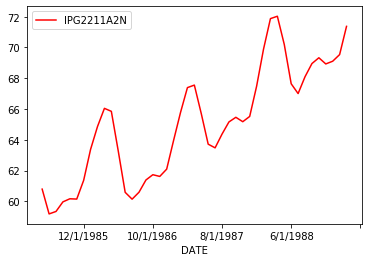

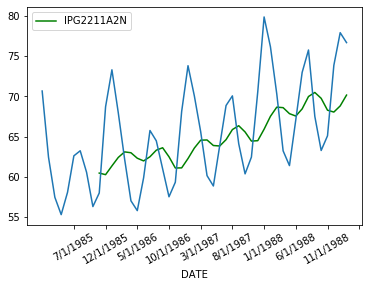

In [33]:

electricity_rolling.plot(c='red')
electricity_rolling2.plot(c='green')
plt.plot(electricity[1:50]['IPG2211A2N'])
plt.xticks(rotation=30)
plt.show()

In [34]:
#As we increase the rolling window the curve started to be more smooth. As it takes more of past observations.

# Simple Exponential Smoothing

In [35]:
data=electricity[1:50]

In [36]:
data.head()

,IPG2211A2N
DATE,
2/1/1985,70.6720
3/1/1985,62.4502
4/1/1985,57.4714
5/1/1985,55.3151
6/1/1985,58.0904


In [40]:
fit1=SimpleExpSmoothing(data).fit(smoothing_level=0.2,optimized=False)

In [41]:
fit2=SimpleExpSmoothing(data).fit(smoothing_level=0.8,optimized=False)

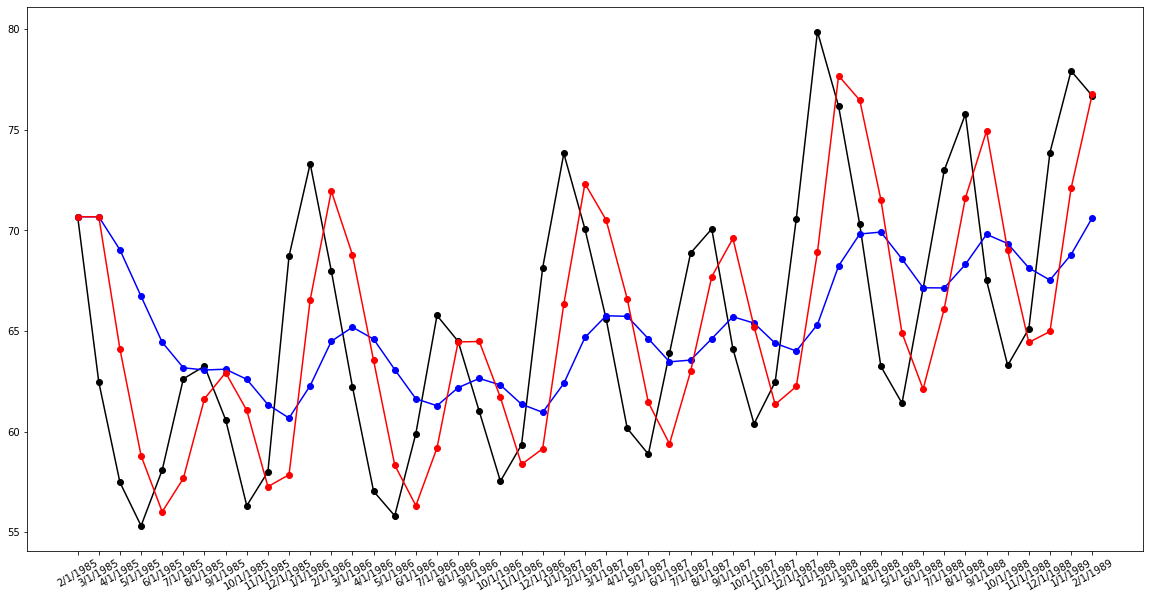

In [42]:
plt.figure(figsize=(20,10))
plt.plot(electricity[1:50],marker='o',color='black')
plt.xticks(rotation=30)

plt.plot(fit1.fittedvalues,marker='o',color='blue')

plt.plot(fit2.fittedvalues,marker='o',color='red')

In [43]:
'''
fit1 is blue we are giving less value of alpha i.e. 0.2
fit is red we are giving more value of alpha i.e. 0.8
alpha value tells us how much weightage we give to most resent observation.
If we give more weight to your recent observation then the curve will follow the original curve.
i.e. it folows black cure which is original.

'''

'\nfit1 is blue we are giving less value of alpha i.e. 0.2\nfit is red we are giving more value of alpha i.e. 0.8\nalpha value tells us how much weightage we give to most resent observation.\nIf we give more weight to your recent observation then the curve will follow the original curve.\ni.e. it folows black cure which is original.\n\n'

# Holt Method for Exponential Smoothing

In [44]:
fit3=Holt(data).fit()


In [45]:
fit4=Holt(data,exponential=True).fit()

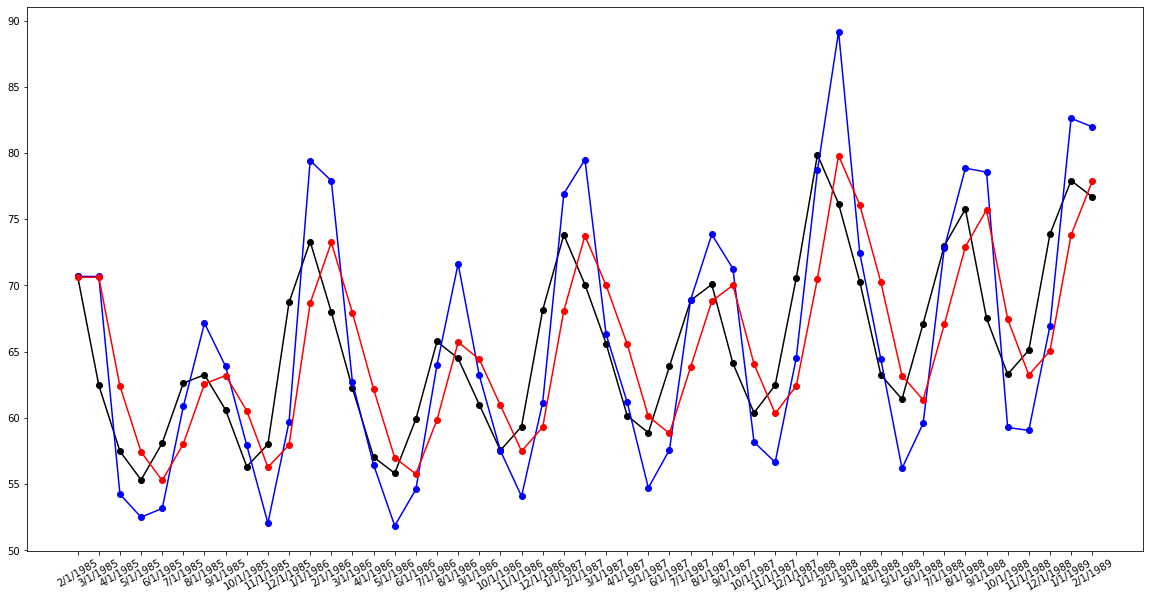

In [46]:
plt.figure(figsize=(20,10))
plt.plot(electricity[1:50],marker='o',color='black')
plt.xticks(rotation=30)

plt.plot(fit3.fittedvalues,marker='o',color='blue')

plt.plot(fit4.fittedvalues,marker='o',color='red')

In [ ]:
'''
fit3 is linear trend which is blue.
fit4 is exponential trend which is red.
'''